# Create a "timeline" with word clouds

A simple word cloud does not often convey the changes that occur over the course of a conversation.
However, by splitting the transcript into segments and generating word clouds for each, one can get a better sense of these changes.

In [1]:
import spacy
import math
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from itertools import zip_longest

In [2]:
transcript_df = pd.read_excel('data/excel/edi_2024_daniel_george.xlsx')
transcript_df.sample(3)

,Unnamed: 0,timestamp,speaker,utterance
321,321,00:25:00,Yuxuan,The sound is so funny.
112,112,00:09:08,Yuxuan,Yes.
406,406,00:34:12,Daniel,Any time.


## Group a list of utterances into a specified number

In [3]:
def grouper(input_list, num_groups, remaining_spaces=''):
    # grouper('abcdefg', 3, remaining_spaces='x') --> ('a','b','c'), ('d','e','f'), ('g','x','x')
    group_size = math.ceil(len(input_list)/num_groups)
    grouped_list = list(zip_longest(*[iter(input_list)]*group_size, fillvalue=remaining_spaces))
    grouped_list = [list(g) for g in grouped_list]
    last_item = ' '.join(grouped_list[-1]).split()
    if len(last_item) <= 2 :
        grouped_list[-2].extend(last_item)
        grouped_list.pop()
    output = [' '.join(list(group)).strip() for group in grouped_list]
    return output

## Plot word cloud for each group

In [4]:
def plot_word_cloud_timeline(text_list, num_segments=10, stopwords=STOPWORDS):
    grouped_text = grouper(text_list, num_segments)
    fig = plt.figure(constrained_layout=True, dpi=300)
    widths = [1 for x in grouped_text]
    color_func = lambda *args, **kwargs: 'black'
    spec = fig.add_gridspec(ncols=len(grouped_text),
                            width_ratios=widths,
                            wspace=0.0, hspace=0.0)
    for ind, text in enumerate(grouped_text):
        ax = fig.add_subplot(spec[ind])
        wc = WordCloud(width=500, height=500,
                       background_color="white",
                       color_func=color_func,
                       max_words=100,
                       stopwords=STOPWORDS)
        wc.generate_from_text(text)
        ax.imshow(wc)
        ax.axis("off")
    plt.savefig('../plots/timeline_wordcloud.pdf', bbox_inches='tight')

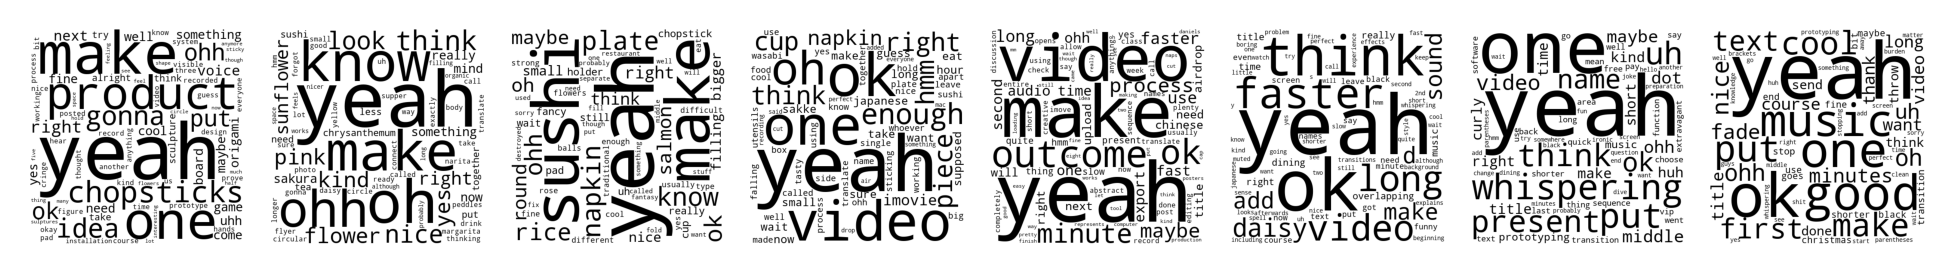

In [5]:
utterances_list = transcript_df['utterance'].to_list()
utterances_list = [utterance.lower() for utterance in utterances_list]
plot_word_cloud_timeline(utterances_list, num_segments=8)